In [1]:
%matplotlib notebook
import sqs_nqs_tools as nqs
from sqs_nqs_tools.offline import access, adata, tof

# Plot options
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Import required libraries
import numpy as np 
import pyqtgraph as pg

# Import karabo libraries
import karabo_bridge as kb
import karabo_data as kd

Welcome to sqs_nqs_tools version v0.2+10.g21ab7bd.dirty


In [43]:
def plot_ccd(shot):
    plt.figure()
    plt.imshow(shot, norm=LogNorm(), cmap = plt.get_cmap('inferno'))
    plt.colorbar()
    plt.show()

In [3]:
run_bg = 168
run_dark = 172
raw_path ='/gpfs/exfel/exp/SQS/201802/p002195/raw'

In [4]:
pnCCDdata = adata.getPnCCD(168,path=raw_path)
pnCCDdata_dark = adata.getPnCCD(172,path=raw_path)

In [74]:
pnCCDavg_dark = np.mean(pnCCDdata_dark,axis=0)
pnCCDavg_bg_only = np.mean(pnCCDdata,axis=0)
pnCCDavg_bg = np.squeeze(pnCCDavg_bg_only-pnCCDavg_dark)
pnCCDavg_bg_np = np.asarray(pnCCDavg_bg).copy()
pnCCDavg_bg_np[pnCCDavg_bg_np<1] = 1

In [111]:
pnCCDdata_run = adata.getPnCCD(165,path=raw_path)

In [114]:
tids = pnCCDdata_run.trainId
tids = np.asarray(tids)
np.argwhere(tids==132959056)

array([[639]])

In [7]:
def get_corr_pnccd_shot(tid, avg_dark):
    shot = pnCCDdata_run.sel(trainId=tid)-np.squeeze(avg_dark)
    shot = np.asarray(shot)
    
    cm_mode_avgs_upper = np.mean(shot[0:150,:], axis = 0)
    cm_mode_cor_upper = np.matlib.repmat(cm_mode_avgs_upper,512,1)
    cm_mode_avgs_lower = np.mean(shot[(1023-150):1023,:], axis = 0)
    cm_mode_cor_lower = np.matlib.repmat(cm_mode_avgs_lower,512,1)

    cm_mode_cor = np.concatenate((cm_mode_cor_upper,cm_mode_cor_lower))
    shot = shot - cm_mode_cor
    return shot


In [18]:
import holoviews as hv

In [19]:
hv.help(hv.Table)

Parameters of 'Table'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                        Value                     Type     Bounds   Mode 

cdims                   OrderedDict()                 Dict              V RW 
datatype   ['dataframe', 'dictionary', 'grid', '...   List   (0, None)  V RW 
group                      'Table'                   String             C RW 
kdims                         []                      List   (0, None)  C RW 
label                         ''                     String             C RW 
vdims                         []                      List   (0, None)  C RW 

Parameter docstrings:

cdims:    The constant dimensions defined as a dictionary of Dimension:value
          pairs providing additional dimension information about the object.
          
          Aliased with constant_dimensions.
datatype: A priority list of

In [66]:
pnCCDdata_shot = pnCCDdata_run.sel(trainId=132959056) - np.squeeze(pnCCDavg_dark)
pnCCDdata_shot = np.asarray(pnCCDdata_shot)

In [9]:
pnCCDdata_shot = get_corr_pnccd_shot(132959056, pnCCDavg_dark) - get_corr_pnccd_shot(132959057, pnCCDavg_dark)

In [15]:
from scipy.ndimage import generic_filter
def filter_func(a):
    lis = np.mean(a)
    return np.mean(a[a>lis])

In [16]:
pnCCDdata_run_proc_bg = np.zeros((50,pnCCDdata_run.shape[1],pnCCDdata_run.shape[2]))
l = pnCCDdata_run_proc_bg.shape[0]
for i in range(l):
    if i%5==0:
        print(str(i)+" / "+str(l))
    pnCCDdata_run_proc_bg[i,:,:] = generic_filter(pnCCDdata_run[i,:,:],filter_func,footprint=np.ones((3,3)))

0 / 50
5 / 50
10 / 50
15 / 50
20 / 50
25 / 50
30 / 50
35 / 50
40 / 50
45 / 50


In [11]:
# import multiprocessing

# pnCCDdata_run_proc_bg = np.zeros((1000,pnCCDdata_run.shape[1],pnCCDdata_run.shape[2]))
# l=pnCCDdata_run_proc_bg.shape[0]

# def multi_func(i):
#     if i%5==0:
#         print(str(i)+" / "+str(l))
#     pnCCDdata_run_proc_bg[i,:,:] = generic_filter(pnCCDdata_run[i,:,:],filter_func,footprint=np.ones((3,3)))

# pool = multiprocessing.Pool(processes=20)
# pool.map(multi_func,range(l))
# pool.close()
# pool.join()
# print('done')


0 / 1000
40 / 1000
80 / 1000
120 / 1000
160 / 1000
200 / 1000
240 / 1000
20 / 1000
60 / 1000
100 / 1000
140 / 1000
220 / 1000
180 / 1000
260 / 1000
300 / 1000
340 / 1000
380 / 1000
420 / 1000
280 / 1000
460 / 1000
320 / 1000
500 / 1000
360 / 1000
520 / 1000
400 / 1000
560 / 1000
440 / 1000
480 / 1000
600 / 1000
540 / 1000
640 / 1000
680 / 1000
720 / 1000
580 / 1000
760 / 1000
620 / 1000
780 / 1000
660 / 1000
820 / 1000
700 / 1000
740 / 1000
860 / 1000
800 / 1000
900 / 1000
840 / 1000
940 / 1000
980 / 1000
880 / 1000
920 / 1000
960 / 1000
done


In [12]:
# run bg mean
print(1)
run_mean = np.mean(pnCCDdata_run_proc_bg,axis = 0)
print(2)
run_std = np.std(pnCCDdata_run_proc_bg,axis = 0)
print(3)

1
2
3


In [13]:
run_2d_cond = np.squeeze(run_mean+0*run_std-pnCCDavg_dark)

raw shot

<IPython.core.display.Javascript object>


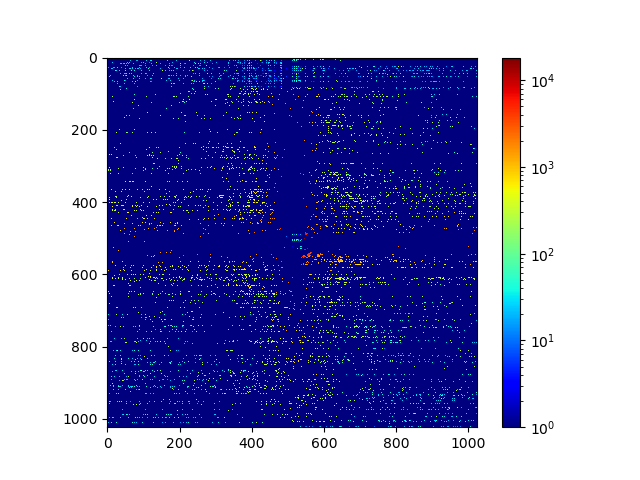

In [14]:
pnCCDdata_shot_plt = pnCCDdata_shot.copy()
pnCCDdata_shot_plt[pnCCDdata_shot_plt<run_2d_cond]=0
pnCCDdata_shot_plt[pnCCDdata_shot_plt<1] = 1
plot_ccd(pnCCDdata_shot_plt)

bg shot

<IPython.core.display.Javascript object>


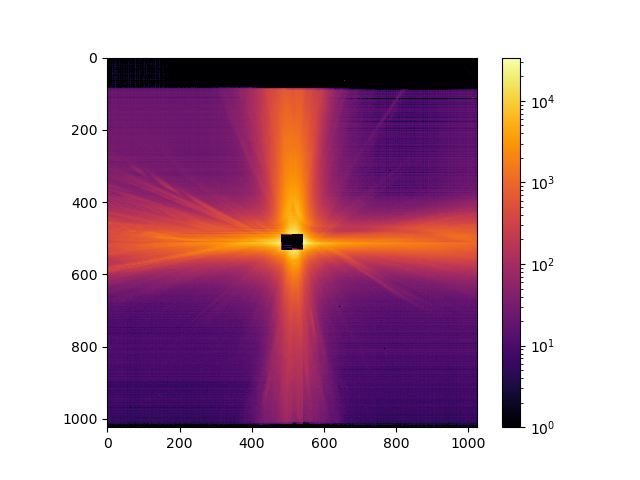

In [75]:
plot_ccd(pnCCDavg_bg_np)

In [68]:
from scipy.signal import savgol_filter as savgol

<IPython.core.display.Javascript object>


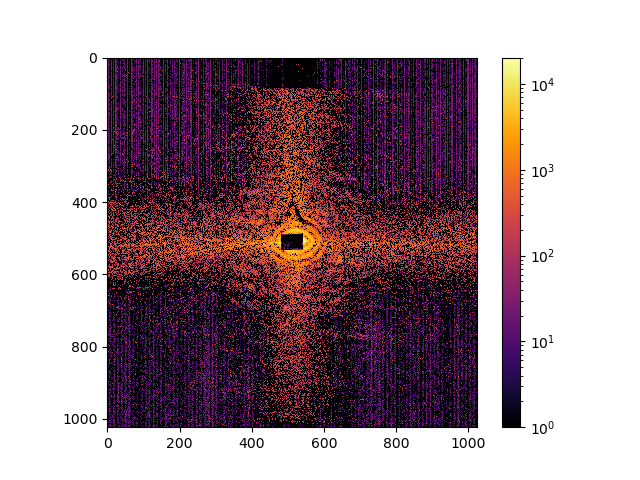

In [76]:
bg_corrected = pnCCDdata_shot-pnCCDavg_bg_np
bg_corrected[bg_corrected<1]=1
plot_ccd(bg_corrected)

<IPython.core.display.Javascript object>


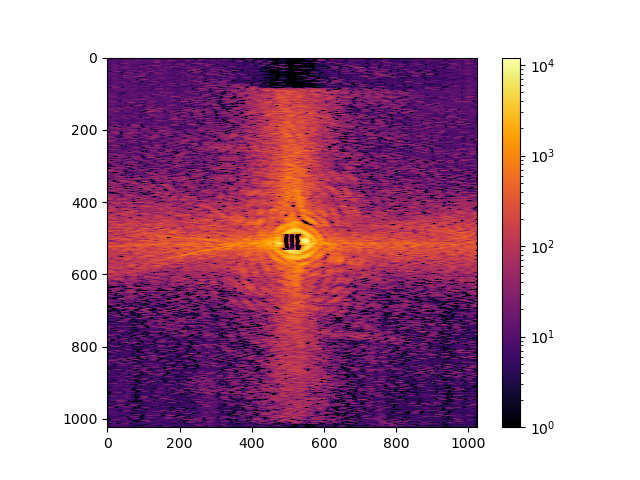

In [77]:
bg_corrected_sav = savgol(bg_corrected,51,4)
bg_corrected_sav[bg_corrected_sav<1] = 1
plot_ccd(bg_corrected_sav)

In [65]:
from scipy.signal import wiener
from scipy import ndimage
from scipy import fftpack

In [94]:
import torch


<IPython.core.display.Javascript object>


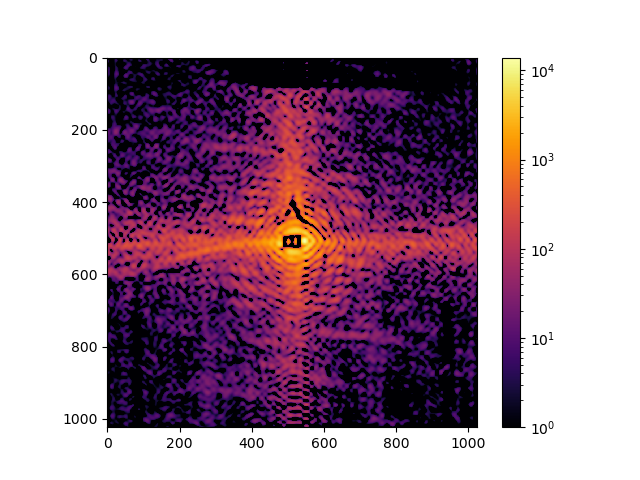

<IPython.core.display.Javascript object>


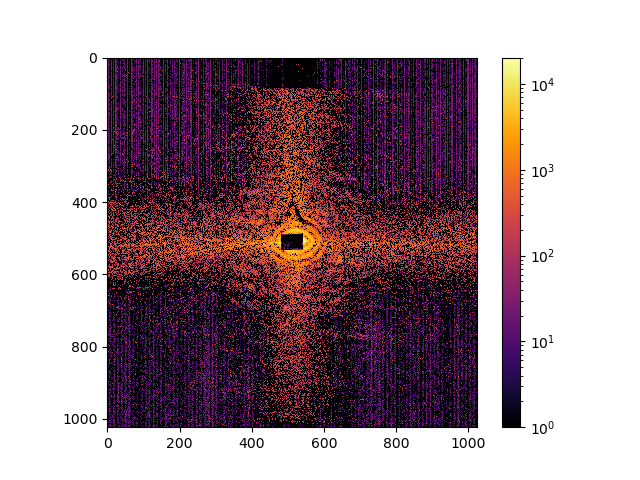

In [93]:
keep_fraction = 0.05
bg_corrected_wiener_0 = pnCCDdata_shot- 1*pnCCDavg_bg_np
bg_corrected_wiener_0_fft = fftpack.fft2(bg_corrected_wiener_0)
w_0_r, w_0_c = bg_corrected_wiener_0_fft.shape
bg_corrected_wiener_0_fft[int(w_0_r*keep_fraction):int(w_0_r*(1-keep_fraction)),:] = 0
bg_corrected_wiener_0_fft[:,int(w_0_c*keep_fraction):int(w_0_c*(1-keep_fraction))] = 0
bg_corrected_wiener_0_new = fftpack.ifft2(bg_corrected_wiener_0_fft).real
# bg_corrected_wiener = wiener(bg_corrected_wiener_0_new.copy(),mysize=3) 
# bg_corrected_wiener = wiener(bg_corrected_wiener,mysize=3)
# # bg_corrected_wiener = ndimage.median_filter(bg_corrected_wiener,5)
# bg_corrected_wiener[bg_corrected_wiener<1] =1
# plot_ccd(bg_corrected_wiener)

fft_cor = bg_corrected_wiener_0_new.copy()
fft_cor[fft_cor<1]=1
plot_ccd(fft_cor)
orig = bg_corrected_wiener_0
orig[orig<1]=1
plot_ccd(orig)

In [119]:
outpath_sean = '/gpfs/exfel/exp/SQS/201802/p002195/usr/Shared/images_for_recreation/'
fname = "hit_BJS_bg_corrected_01_tid"+str(132959056)+"_R"+str(165)+".dat"
np.savetxt(outpath_sean+fname,bg_corrected_wiener,delimiter=",")

In [109]:
background_pnCCD = np.load('/home/bjoerns/code/XFEL_SQS_NQS_Tools/scripts/bokeh_live/background_max_pnCCD.npy')
print(np.mean(background_pnCCD))
print(np.max(background_pnCCD))
print(np.min(background_pnCCD))

65225.39964771271
65535
215


<IPython.core.display.Javascript object>


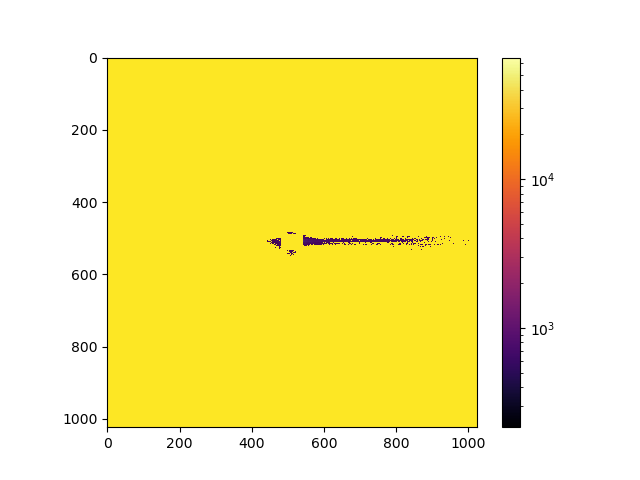

In [110]:

background_pnCCD[background_pnCCD<1]=1
plot_ccd(background_pnCCD)

In [53]:
a = np.ones((1024,512))
b = np.ones((1024,512))
c = np.concatenate((a,b),axis =1)
c.shape

(1024, 1024)

In [33]:
background_pnCCD.shape

()

<IPython.core.display.Javascript object>


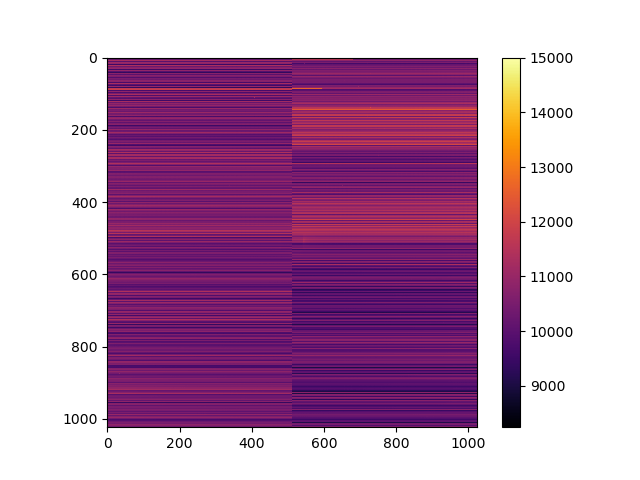

In [50]:
shot = background_pnCCD.copy()
shot[shot>15000] = 15000
plt.figure()
plt.imshow(shot, cmap = plt.get_cmap('inferno'))
plt.colorbar()
plt.show()

In [56]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [131]:
import sqs_nqs_tools as nqs
from sqs_nqs_tools.offline import access, adata, tof

# Plot options
import matplotlib.pyplot as plt

# Import required libraries
import numpy as np 
import pyqtgraph as pg

# Import karabo libraries
import karabo_bridge as kb
import karabo_data as kd

def print_stats(arr):
    print(np.max(np.asarray(arr)))
    print(np.min(np.asarray(arr)))
    print(np.mean(np.asarray(arr)))
    print('---')

for_sean = False
dark_only = False
run_bg = 368
run_dark = 365
raw_path ='/gpfs/exfel/exp/SQS/201802/p002195/raw'
outpath_sean = '/gpfs/exfel/exp/SQS/201802/p002195/usr/Shared/images_for_recreation/'
pnCCDdata = adata.getPnCCD(run_bg,path=raw_path)
pnCCDdata_dark = adata.getPnCCD(run_dark,path=raw_path)

In [132]:
dark_avg = np.mean(pnCCDdata_dark.sel(trainId=slice(10,1e10)),axis=0)
dark_avg_2 = np.asarray(dark_avg.copy())
#dark_avg_2[dark_avg_2<0] = 0

pnCCDdata_p = pnCCDdata.copy()
pnCCDdata_p = np.asarray(pnCCDdata_p) -dark_avg_2
# for i in range(pnCCDdata.shape[0]):
#     pnCCDdata_p[i,:,:] = pnCCDdata_p[i,:,:] - dark_avg_2
#     if False:
#         cm_mode_avgs_upper = np.mean(pnCCDdata_p[i,0:150,:], axis = 0)
#         cm_mode_cor_upper = np.matlib.repmat(np.squeeze(cm_mode_avgs_upper),512,1)
#         cm_mode_avgs_lower = np.mean(pnCCDdata_p[i,(1023-150):1023,:], axis = 0)
#         cm_mode_cor_lower = np.matlib.repmat(np.squeeze(cm_mode_avgs_lower),512,1)
#         #~ print(cm_mode_avgs_lower.shape)
#         #~ print(cm_mode_cor_lower.shape)
#         cm_mode_cor = np.concatenate((cm_mode_cor_upper,cm_mode_cor_lower))
#         pnCCDdata_p[i,:,:] = pnCCDdata_p[i,:,:] - cm_mode_cor
pnCCDmax =  np.max(pnCCDdata_p,axis=0)
pnCCDavg = np.mean(pnCCDdata.sel(trainId=slice(10,1e10)),axis=0)-dark_avg
print_stats(np.mean(pnCCDdata.sel(trainId=slice(10,1e10)),axis=0))

pnCCDavg = np.squeeze(pnCCDavg)

print_stats(np.mean(pnCCDdata_dark.sel(trainId=slice(10,1e10)),axis=0))
print_stats(pnCCDavg)
print_stats(pnCCDmax)
print_stats(np.mean(pnCCDdata_p,axis=0))


52515.166666666664
8407.245283018869
10288.263186868635
---
52489.705501618126
8406.079827400215
10263.505862360507
---
16816.94891209216
-223.43257820927647
24.757324508126903
---
35800.790722761594
-144.43257820927647
246.72584998080396
---
16816.94891209207
-223.43257820927784
24.757324508126903
---


<IPython.core.display.Javascript object>


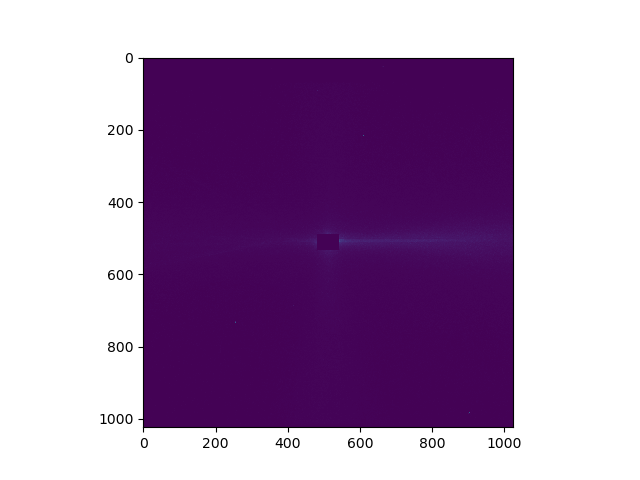

In [133]:
plt.figure()
plt.imshow(pnCCDmax)
plt.show()

<IPython.core.display.Javascript object>


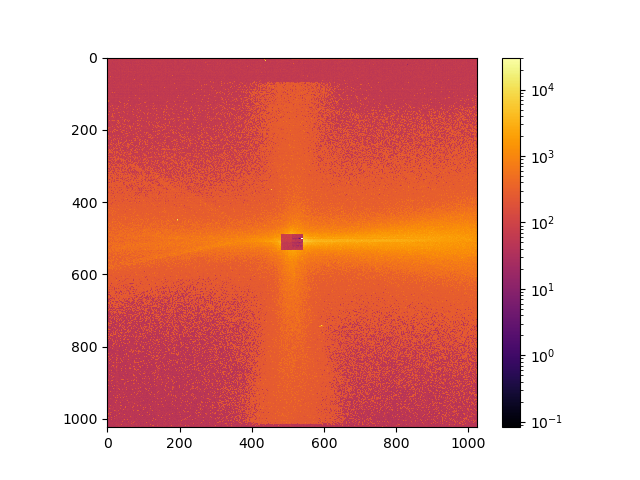

In [127]:
plot_ccd(np.squeeze(pnCCDmax))